In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.3 kB/s 
     |████████████████████████████████| 6.6 MB 25.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.1+cu101 which is incompatible.
     |████████████████████████████████| 324 kB 4.1 MB/s 
     |████████████████████████████████| 185 kB 36.9 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-lin

In [ ]:
!mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
       -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2021-10-02 05:45:00--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  10.9MB/s    in 17s     

2021-10-02 05:45:18 (10.2 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

/content/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [ ]:
# Use the detector to do inference
img = 'demo/test2.jpeg' 
result = inference_detector(model, img)


/content/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


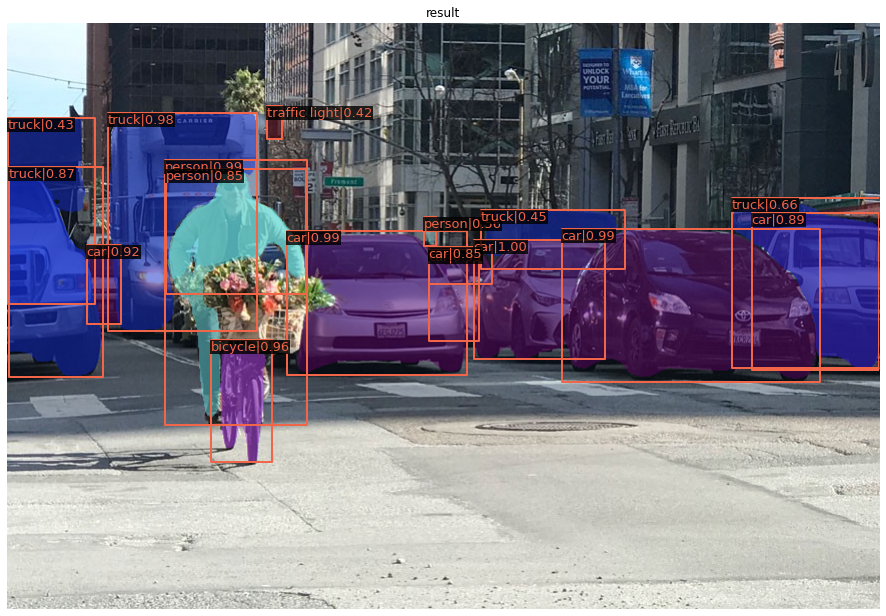

In [ ]:
show_result_pyplot(model, img, result, score_thr=0.4)

In [ ]:
category_map = {
    0: '__background__',
    1: 'person',
    2: 'bicycle',
    3: 'car',
    4: 'motorcycle',
    5: 'airplane',
    6: 'bus',
    7: 'train',
    8: 'truck',
    9: 'boat',
    10: 'traffic light',
    11: 'fire hydrant',
    12: 'stop sign',
    13: 'parking meter',
    14: 'bench',
    15: 'bird',
    16: 'cat',
    17: 'dog',
    18: 'horse',
    19: 'sheep',
    20: 'cow',
    21: 'elephant',
    22: 'bear',
    23: 'zebra',
    24: 'giraffe',
    25: 'backpack',
    26: 'umbrella',
    27: 'handbag',
    28: 'tie',
    29: 'suitcase',
    30: 'frisbee',
    31: 'skis',
    32: 'snowboard',
    33: 'sports ball',
    34: 'kite',
    35: 'baseball bat',
    36: 'baseball glove',
    37: 'skateboard',
    38: 'surfboard',
    39: 'tennis racket',
    40: 'bottle',
    41: 'wine glass',
    42: 'cup',
    43: 'fork',
    44: 'knife',
    45: 'spoon',
    46: 'bowl',
    47: 'banana',
    48: 'apple',
    49: 'sandwich',
    50: 'orange',
    51: 'broccoli',
    52: 'carrot',
    53: 'hot dog',
    54: 'pizza',
    55: 'donut',
    56: 'cake',
    57: 'chair',
    58: 'couch',
    59: 'potted plant',
    60: 'bed',
    61: 'dining table',
    62: 'toilet',
    63: 'tv',
    64: 'laptop',
    65: 'mouse',
    66: 'remote',
    67: 'keyboard',
    68: 'cell phone',
    69: 'microwave',
    70: 'oven',
    71: 'toaster',
    72: 'sink',
    73: 'refrigerator',
    74: 'book',
    75: 'clock',
    76: 'vase',
    77: 'scissors',
    78: 'teddy bear',
    79: 'hair drier',
    80: 'toothbrush'
 }

import numpy as np
import mmcv
img = mmcv.imread(img)
img = img.copy()
if isinstance(result, tuple):
    bbox_result, segm_result = result
    if isinstance(segm_result, tuple):
        segm_result = segm_result[0]  # ms rcnn
else:
    bbox_result, segm_result = result, None
bboxes = np.vstack(bbox_result)

labels = [
np.full(bbox.shape[0], i, dtype=np.int32)
for i, bbox in enumerate(bbox_result)
]
labels = np.concatenate(labels)


scores = bboxes[:, -1]
inds = scores > 0.4
bboxes = bboxes[inds, :]
labels = labels[inds]

objects = []

for label in labels:
  objects.append(category_map[label+1])
  
print(objects)